In [132]:
import pandas as pd

In [133]:
df=pd.read_csv(r"C:\Users\sharw\OneDrive\Desktop\ML\scores_data.csv")

In [134]:
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [135]:
df.shape

(149, 3)

In [136]:
df.columns

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')

In [137]:
df.columns=df.columns.str.strip()

In [138]:
df.columns

Index(['Batch', 'User_ID', 'Score'], dtype='object')

In [139]:
df['Batch'].value_counts()

Batch
AI_ELITE_7    53
AI_ELITE_6    48
AI_ELITE_4    48
Name: count, dtype: int64

In [140]:
df['User_ID'].value_counts().sum()

149

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Batch    149 non-null    object
 1   User_ID  149 non-null    object
 2   Score    149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [142]:
df.describe()

,Batch,User_ID,Score
count,149,149,149
unique,3,149,8
top,AI_ELITE_7,uid_149,4 / 7
freq,53,1,40


In [143]:
df.duplicated().sum()

0

In [144]:
df.isna().sum()

Batch      0
User_ID    0
Score      0
dtype: int64

In [145]:
df['Score'].dtype

dtype('O')

In [146]:
df['Score'].value_counts()

Score
4 / 7    40
5 / 7    32
3 / 7    24
6 / 7    18
7 / 7    18
2 / 7    12
1 / 7     3
0 / 7     2
Name: count, dtype: int64

In [147]:
df['Score'].str.extract(r'(\d+)').astype('float')

,0
0,6.0
1,6.0
2,7.0
3,7.0
4,4.0
...,...
144,4.0
145,4.0
146,4.0
147,3.0


In [148]:
df['Score']=df['Score'].str.extract(r'(\d+)').astype('float')

In [149]:
df['Score'].dtype

dtype('float64')

In [150]:
df['Score'].isna().sum()

0

In [151]:
batch_stats=df.groupby('Batch')['Score'].mean()

In [152]:
batch_stats

Batch
AI_ELITE_4    3.791667
AI_ELITE_6    4.229167
AI_ELITE_7    5.056604
Name: Score, dtype: float64

In [153]:
batch_stats=df.groupby('Batch')['Score'].agg(['mean','median','min','max','count'])

In [154]:
batch_stats

,mean,median,min,max,count
Batch,,,,,
AI_ELITE_4,3.791667,4.0,0.0,7.0,48
AI_ELITE_6,4.229167,4.0,0.0,7.0,48
AI_ELITE_7,5.056604,5.0,2.0,7.0,53


In [155]:
df.max()

Batch      AI_ELITE_7
User_ID        uid_99
Score             7.0
dtype: object

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

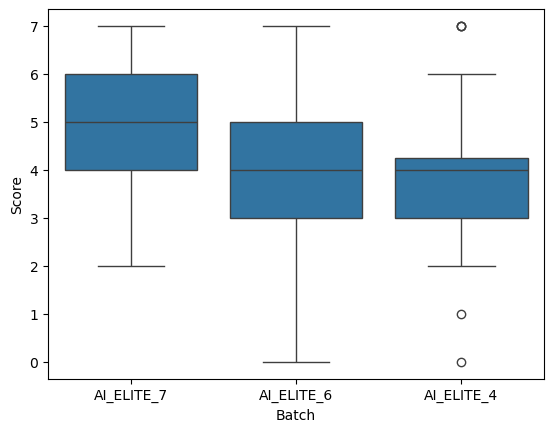

In [124]:
sns.boxplot(data=df,x='Batch',y='Score')
plt.show()

- **Batch AI_ELITE_7** shows the strongest overall performance, with the highest median score and tightly clustered results.
- **Batch AI_ELITE_6** has the widest score spread, ranging from 0 to 7, indicating inconsistent performance despite a few high scorers.
- **Batch AI_ELITE_4** has a lower median and includes outliers, suggesting uneven preparation and potential need for support.

These findings highlight AI_ELITE_7 as the most balanced batch.

<Axes: xlabel='Batch', ylabel='Score'>

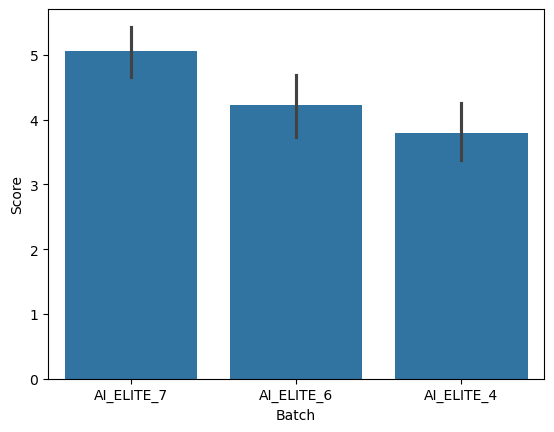

In [131]:
sns.barplot(data=df,x='Batch',y='Score')

- **Batch AI_ELITE_7** achieved the highest average score and showed consistent performance with tightly clustered scores.
- **Batch AI_ELITE_4** had the lowest average score and included several low outliers, indicating uneven preparation.
- **Batch AI_ELITE_6** displayed the widest score spread, suggesting variability in student performance despite some high scorers.

These findings highlight AI_ELITE_7 as the most balanced and high-performing batch, while AI_ELITE_4 and AI_ELITE_6 may benefit from targeted support to improve consistency and raise overall scores.

<Axes: xlabel='Score', ylabel='Count'>

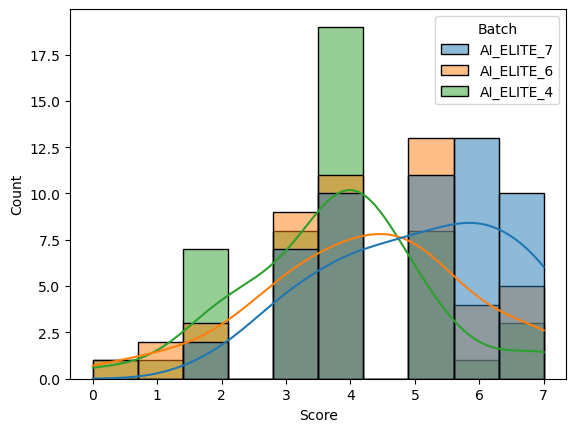

In [128]:
sns.histplot(data=df,x='Score',hue='Batch',kde='True')

- **AI_ELITE_7** shows a strong and consistent score distribution, with most students scoring between 5 and 6.
- **AI_ELITE_6** has a wide spread of scores, ranging from 0 to 7, indicating inconsistent performance.
- **AI_ELITE_4** displays a bimodal distribution, with clusters around 4 and 6 but also several low scores, suggesting uneven preparation.

These patterns reinforce earlier findings: AI_ELITE_7 is the most balanced batch, while AI_ELITE_6 and AI_ELITE_4 may benefit from targeted review sessions and instructional support.